In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

SyntaxError: invalid syntax (<ipython-input-151-68cc42dbdca7>, line 7)

In [81]:
dataset = pd.read_csv("MCD.csv")

In [82]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [83]:
df.shape

(200, 5)

In [84]:
df.describe()

,CustomerID,Gender,Age,Annual_income,Spending_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,20.680000,60.517500,50.200000
std,57.879185,0.497633,13.636251,26.143551,25.823522
min,1.000000,0.000000,0.000000,15.000000,1.000000
25%,50.750000,0.000000,10.750000,41.500000,34.750000
50%,100.500000,0.000000,18.000000,61.500000,50.000000
75%,150.250000,1.000000,31.000000,78.000000,73.000000
max,200.000000,1.000000,50.000000,132.750000,99.000000


In [85]:
#Changing the name of some columns
df = df.rename(columns={'Annual Income (k$)': 'Annual_income', 'Spending Score (1-100)': 'Spending_score'})

In [86]:
#Replacing objects for numerical values
df['Gender'].replace(['Female','Male'], [0,1],inplace=True)

# Univariate Analysis , Bivariate , Multivariate

In [87]:
df_Gender=df.loc[df['Gender']=='Female']


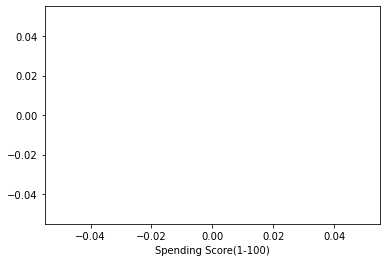

In [88]:
plt.plot(df_Gender['Age'], np.zeros_like(df_Gender['Age']))
plt.xlabel('Spending Score(1-100)')
plt.show()

In [89]:
#Checking values have been replaced properly
df.Gender

0      1.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
195    0.0
196    0.0
197    1.0
198    1.0
199    1.0
Name: Gender, Length: 200, dtype: float64

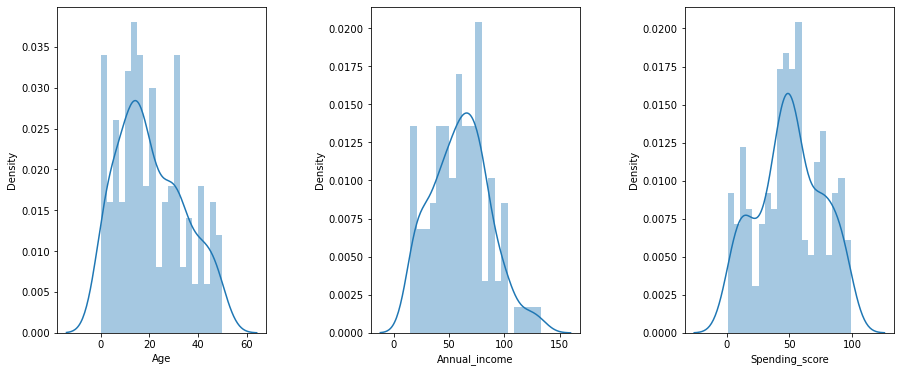

In [90]:
#Density estimation of values using distplot
plt.figure(1 , figsize = (15 , 6))
feature_list = ['Age','Annual_income', "Spending_score"]
feature_listt = ['Age','Annual_income', "Spending_score"]
pos = 1 
for i in feature_list:
    plt.subplot(1 , 3 , pos)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[i], bins=20, kde = True)
    pos = pos + 1
plt.show()

0.0    112
1.0     88
Name: Gender, dtype: int64

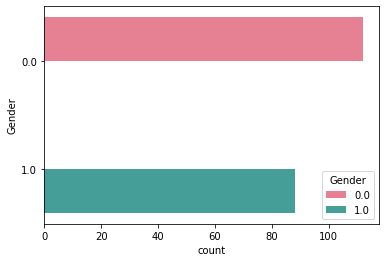

In [91]:
#Count and plot gender
sns.countplot(y = 'Gender', data = df, palette="husl", hue = "Gender")
df["Gender"].value_counts()

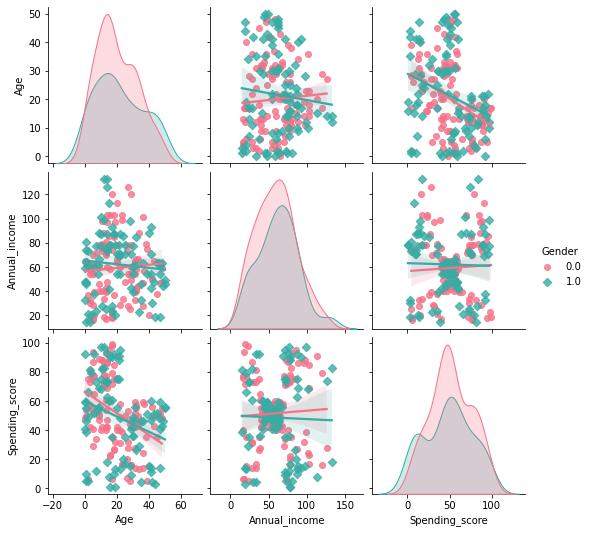

In [92]:
#Pairplot with variables we want to study
sns.pairplot(df, vars=["Age", "Annual_income", "Spending_score"],  kind ="reg", hue = "Gender", palette="husl", markers = ['o','D'])

# Statistic Analysis

In [93]:
df.head()

,CustomerID,Gender,Age,Annual_income,Spending_score
0,1.0,1.0,1,15.0,39.0
1,2.0,1.0,3,15.0,81.0
2,3.0,0.0,2,16.0,6.0
3,4.0,0.0,5,16.0,77.0
4,5.0,0.0,13,17.0,40.0


In [94]:
df.describe()

,CustomerID,Gender,Age,Annual_income,Spending_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,20.680000,60.517500,50.200000
std,57.879185,0.497633,13.636251,26.143551,25.823522
min,1.000000,0.000000,0.000000,15.000000,1.000000
25%,50.750000,0.000000,10.750000,41.500000,34.750000
50%,100.500000,0.000000,18.000000,61.500000,50.000000
75%,150.250000,1.000000,31.000000,78.000000,73.000000
max,200.000000,1.000000,50.000000,132.750000,99.000000


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      200 non-null    float64
 1   Gender          200 non-null    float64
 2   Age             200 non-null    int64  
 3   Annual_income   200 non-null    float64
 4   Spending_score  200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [96]:
df['Annual_income'].value_counts().to_frame()

,Annual_income
54.00,12
78.00,12
63.00,6
71.00,6
87.00,6
...,...
132.75,2
57.00,2
50.00,2
18.00,2


# Missing Values

In [97]:
df[df.duplicated()]

,CustomerID,Gender,Age,Annual_income,Spending_score


In [98]:
df.isna().sum()

CustomerID        0
Gender            0
Age               0
Annual_income     0
Spending_score    0
dtype: int64

# Replace the outliers

In [99]:
for i in df:
    if df[i].dtype=='int64' or df[i].dtypes=='float64':
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        upper=q3+1.5*iqr
        lower=q1-1.5*iqr
        df[i]=np.where(df[i] >upper, upper, df[i])
        df[i]=np.where(df[i] <lower, lower, df[i])

In [100]:
import matplotlib.pyplot as mtp

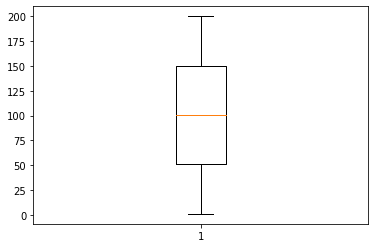

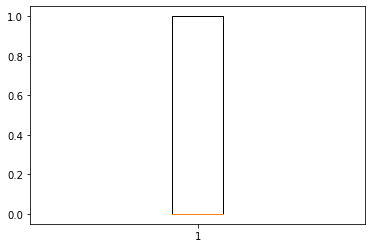

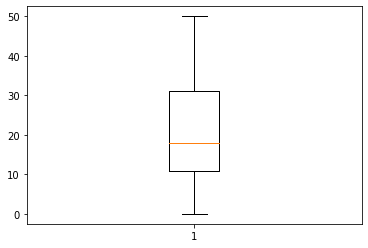

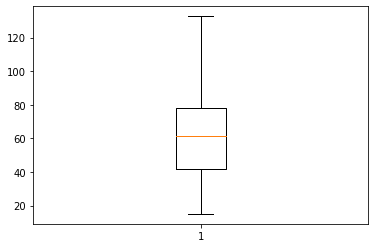

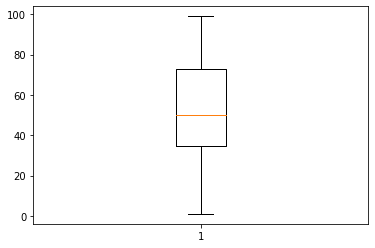

In [101]:
def box_scatter(df, x, y):    
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16,6))
    sns.boxplot(df=df, x=x, ax=ax1)
    sns.scatterplot(df=df, x=x,y=y,ax=ax2)
for i in df:
    if df[i].dtype=='int64' or df[i].dtypes=='float64':
        mtp.boxplot(df[i])
        mtp.show()

# Encoding

In [102]:
df.head()

,CustomerID,Gender,Age,Annual_income,Spending_score
0,1.0,1.0,1.0,15.0,39.0
1,2.0,1.0,3.0,15.0,81.0
2,3.0,0.0,2.0,16.0,6.0
3,4.0,0.0,5.0,16.0,77.0
4,5.0,0.0,13.0,17.0,40.0


In [103]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Age']=encoder.fit_transform(df['Age'])
df.head()

,CustomerID,Gender,Age,Annual_income,Spending_score
0,1.0,1.0,1,15.0,39.0
1,2.0,1.0,3,15.0,81.0
2,3.0,0.0,2,16.0,6.0
3,4.0,0.0,5,16.0,77.0
4,5.0,0.0,13,17.0,40.0


In [104]:
x=df.iloc[:,:-1]
x.head()

,CustomerID,Gender,Age,Annual_income
0,1.0,1.0,1,15.0
1,2.0,1.0,3,15.0
2,3.0,0.0,2,16.0
3,4.0,0.0,5,16.0
4,5.0,0.0,13,17.0


# Independent Variable Scaling

In [105]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

# Cluster data

In [124]:
#Creating values for the elbow
from sklearn.cluster import KMeans
X = df.loc[:,["Age", "Annual_income", "Spending_score"]]
inertia = []
k = range(1,20)
for i in k:
    means_k = KMeans(n_clusters=i, random_state=0)
    means_k.fit(X)
    inertia.append(means_k.inertia_)

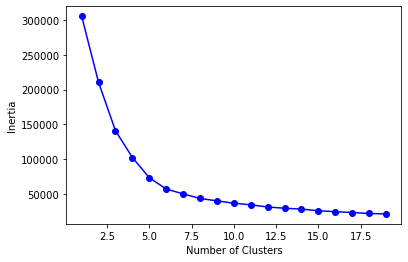

In [125]:
#Plotting the elbow
plt.plot(k , inertia , 'bo-')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

# Clustering

In [145]:
#Training kmeans with 5 clusters
means_k = KMeans(n_clusters=5, random_state=0)
means_k.fit(X)
labels = means_k.labels_
centroids = means_k.cluster_centers_

In [ ]:
pip install plotly

In [ ]:
#Create a 3d plot to view the data sepparation made by Kmeans





import plotly.express as px
import plotly.graph_objs as go



trace1 = go.Scatter3d(
    x= X['Spending_score'],
    y= X['Annual_income'],
    z= X['Age'],
    mode='markers',
     marker=dict(
        color = labels, 
        size= 10,
        line=dict(
            color= labels,
        ),
        opacity = 0.9
     )
)
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Spending_score'),
            yaxis = dict(title  = 'Annual_income'),
            zaxis = dict(title  = 'Age')
        )
)
fig = go.Figure(data=trace1, layout=layout)
py.offline.iplot(fig)

# Splitting Data

In [106]:
from sklearn.model_selection import train_test_split

In [113]:
from sklearn import datasets 
from sklearn.model_selection import train_test_split

digits=datasets.load_digits()

x=digits.data
print();print(X.shape)

y=digits.target
print();print(Y.shape)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

print(); print(x_train.shape)
print(); print(x_test.shape)
print(); print(y_train.shape)
print(); print(y_test.shape)


(1797, 64)

(1797,)

(1203, 64)

(594, 64)

(1203,)

(594,)


# Build the model

In [116]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()

# Train the model

In [117]:
reg.fit(x_train,y_train)

RandomForestRegressor()

# Test the model

In [120]:
y_pred=reg.predict(x_test)

# Performance mesurement

In [122]:
from sklearn.metrics import mean_squared_error
import math
print(math.sqrt(mean_squared_error(y_test,y_pred)))

1.1367420514709974
